In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram


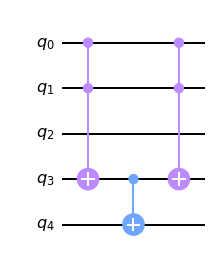

In [3]:
n=5
qc = QuantumCircuit(n)
qc.ccx(0,1,3)
qc.cx(3,4)
qc.ccx(0,1,3)
qc.draw('mpl')

In [4]:

def phase_oracle2():
    qc = QuantumCircuit(5)
    qc.ccx(0,1,3)
    qc.cx(3,4)
    qc.ccx(0,1,3)
    
    return qc

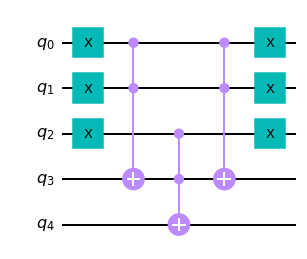

In [5]:
n=5
qc = QuantumCircuit(n)
for i in range(n-2):
    qc.x(i)
qc.ccx(0,1,3)
qc.ccx(2,3,4)
qc.ccx(0,1,3)
for i in range(n-2):
    qc.x(i)
qc.draw('mpl')

In [6]:
def diffuser(n, name='V'):
    qc = QuantumCircuit(n, name=name)
    
    for qb in range(n-2): #first layer of Hadamards in diffuser
        qc.h(qb)
   
    for i in range(n-2):
        qc.x(i)
    qc.ccx(0,1,3)
    qc.ccx(2,3,4)
    qc.ccx(0,1,3)
    for i in range(n-2):
        qc.x(i)
    
    for qb in range(n-2): #second layer of Hadamards in diffuser
        qc.h(qb)
        
    return qc

In [9]:
U_gate = phase_oracle2().to_gate()
U_gate.label = "U2"
Con_U =U_gate.control()

In [10]:
V_gate = diffuser(n).to_gate()
V_gate.label = "V"
Con_V =V_gate.control()

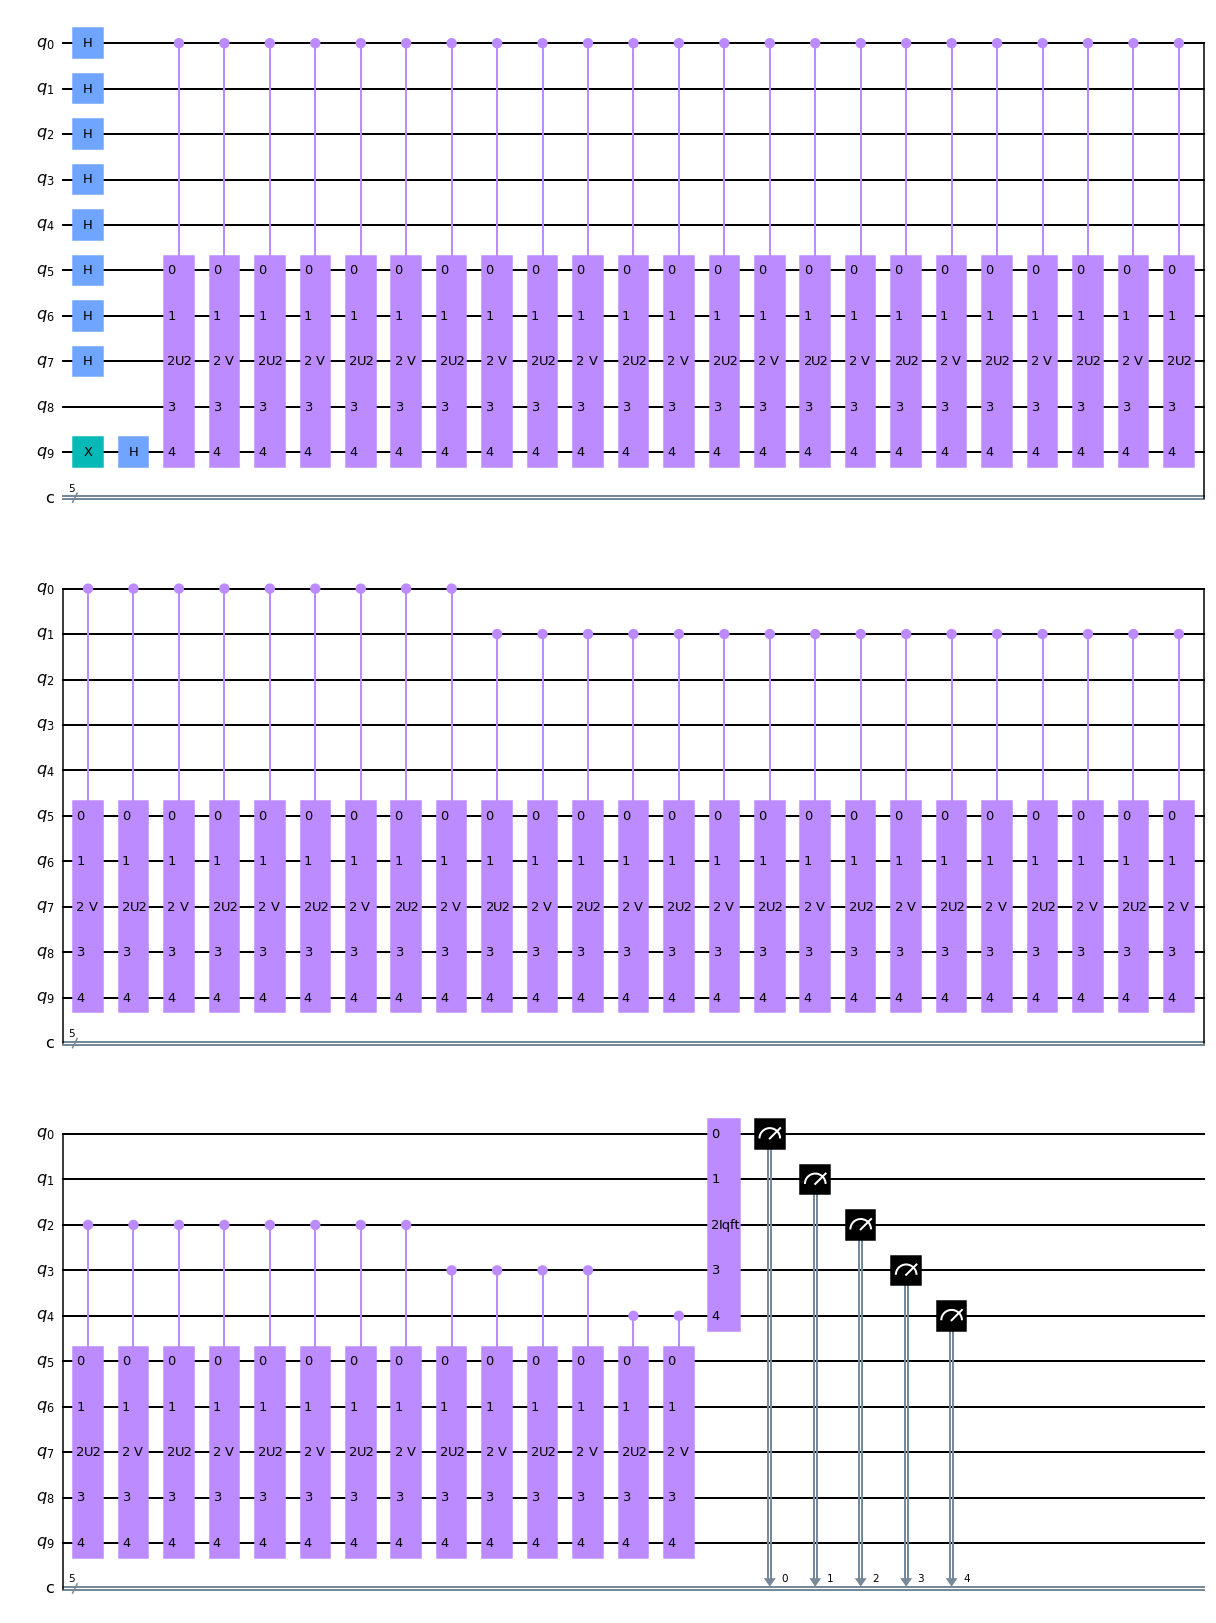

In [27]:
n=5
c=5
qc=QuantumCircuit(n+c,c)

for qubit in range(n+c-2):
    qc.h(qubit)
# put ancilla in state |->
qc.x(n+c-1)
qc.h(n+c-1)
    
for x in range(c):
        exponent = 2**(c-x-1)
        for j in range(exponent):
            qc.append(Con_U,[x] + list(range(c, n+c)))
            qc.append(Con_V,[x] + list(range(c, n+c)))

qc.append(QFT(c).inverse(), range(c))       

for i in range(c):
    qc.measure(i,i)

qc.draw('mpl')

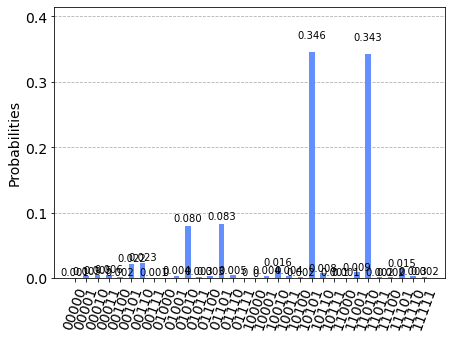

In [28]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=simulator, shots=10000).result().get_counts()
plot_histogram(counts)

In [29]:
import operator
highest_probability_string = max(counts.items(), key=operator.itemgetter(1))[0][::-1]
hp_int=int(highest_probability_string,2)

In [30]:
import math as mt
N=2**(n-2)
theta=2*mt.pi*hp_int/(2**c)
M=N*(mt.sin(theta/2))**2
print('M = ',M)
print('N = ',N)
print('Number of solutions = ',N-M)


M =  6.22228093207841
N =  8
Number of solutions =  1.7777190679215904
